In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import joblib
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv('../dataset/MultipleChoiceData.csv')
df.head()

,soal,opsi_a,opsi_b,opsi_c,opsi_d,jawaban_benar
0,Hewan pemakan tumbuhan disebut ...,Herbivora,Karnivora,Omnivora,Insektivora,Herbivora
1,Gunung tertinggi di Indonesia adalah ...,Puncak Jaya,Semeru,Rinjani,Kerinci,Puncak Jaya
2,Bentuk bumi adalah ...,Bulat,Kotak,Segitiga,Lonjong,Bulat
3,Perubahan wujud dari air menjadi uap disebut ...,Penguapan,Pembekuan,Pencairan,Penyubliman,Penguapan
4,Planet terbesar di tata surya adalah ...,Jupiter,Saturnus,Mars,Bumi,Jupiter


In [5]:
print("Number of Rows and Columns : ", df.shape)
print("\nInfo Dataset : ")
print(df.info())
print("\nNumber of Missing value per column : ")
print(df.isnull().sum())
print("\nDescriptive Statistics : ")
print(df.describe())

Number of Rows and Columns :  (500, 6)

Info Dataset : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   soal           500 non-null    object
 1   opsi_a         500 non-null    object
 2   opsi_b         500 non-null    object
 3   opsi_c         500 non-null    object
 4   opsi_d         500 non-null    object
 5   jawaban_benar  500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB
None

Number of Missing value per column : 
soal             0
opsi_a           0
opsi_b           0
opsi_c           0
opsi_d           0
jawaban_benar    0
dtype: int64

Descriptive Statistics : 
                                            soal   opsi_a    opsi_b opsi_c  \
count                                        500      500       500    500   
unique                                        10       10        10     10   
top     Planet terbesar

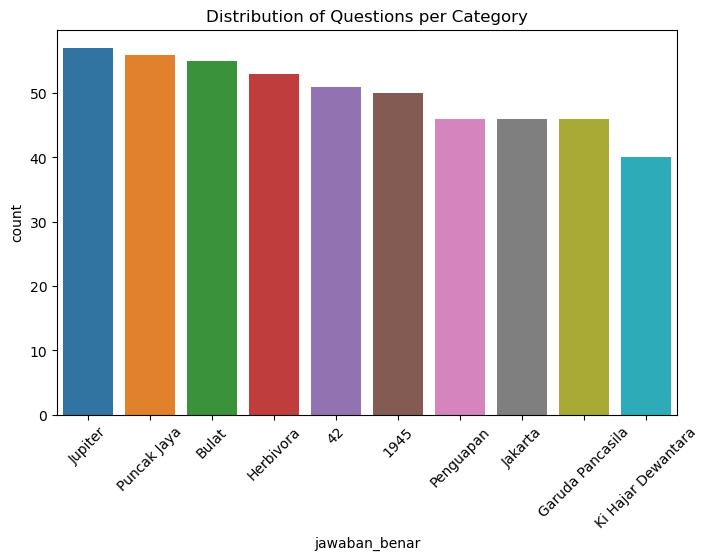

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='jawaban_benar', order=df['jawaban_benar'].value_counts().index)
plt.title("Distribution of Questions per Category")
plt.xticks(rotation=45)
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


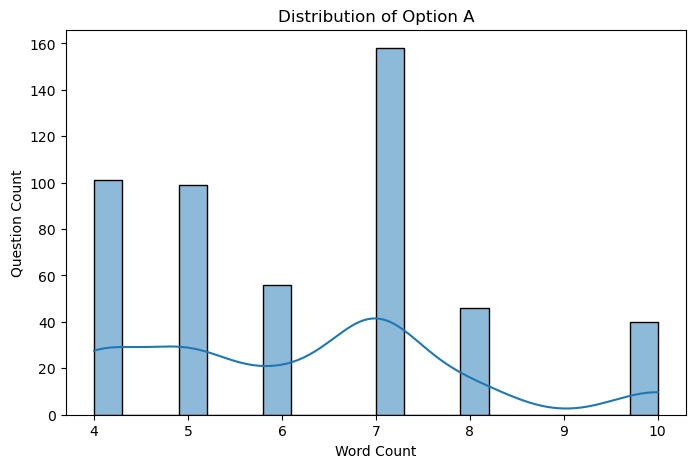

In [8]:
df['opsi_a'] = df['soal'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['opsi_a'], bins=20, kde=True)
plt.title("Distribution of Option A")
plt.xlabel("Word Count")
plt.ylabel("Question Count")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


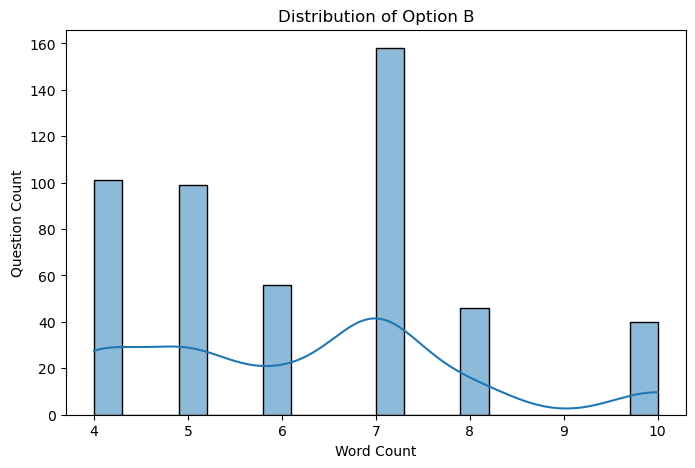

In [10]:
df['opsi_b'] = df['soal'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['opsi_b'], bins=20, kde=True)
plt.title("Distribution of Option B")
plt.xlabel("Word Count")
plt.ylabel("Question Count")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


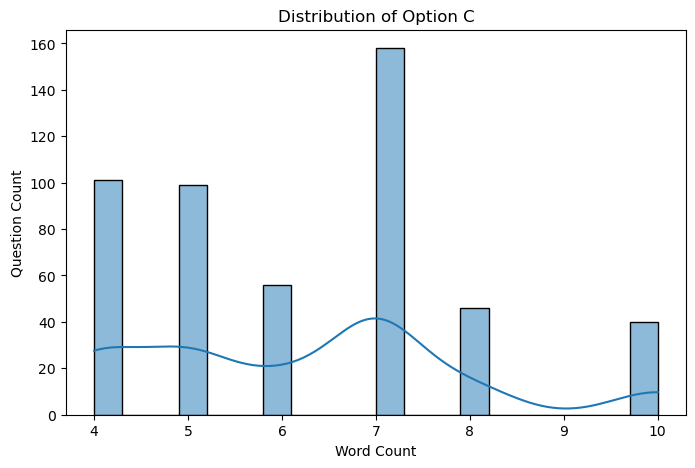

In [11]:
df['opsi_c'] = df['soal'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['opsi_c'], bins=20, kde=True)
plt.title("Distribution of Option C")
plt.xlabel("Word Count")
plt.ylabel("Question Count")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


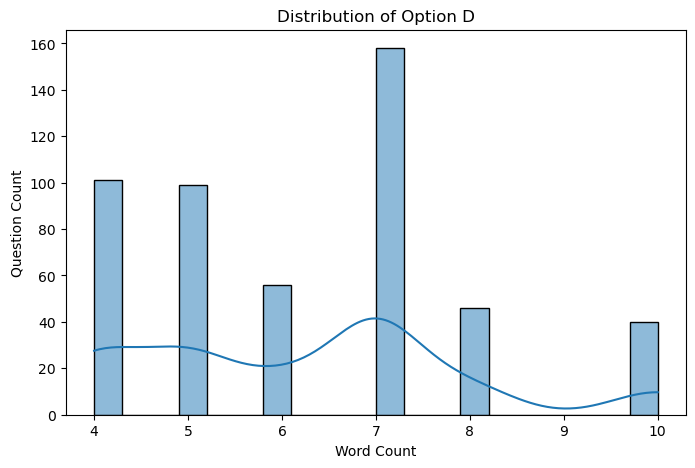

In [12]:
df['opsi_d'] = df['soal'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(df['opsi_d'], bins=20, kde=True)
plt.title("Distribution of Option D")
plt.xlabel("Word Count")
plt.ylabel("Question Count")
plt.show()

In [13]:
X = df.drop(columns=['jawaban_benar'])
y = df['jawaban_benar']

In [18]:
df = df.astype(str)
df['gabungan_teks'] = df['soal'] + " " + df['opsi_a'] + " " + df['opsi_b'] + " " + df['opsi_c'] + " " + df['opsi_d']


In [21]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['gabungan_teks'])

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
  X_tfidf,
  y_encoded,
  test_size=0.2,
  random_state=42
)

In [22]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [23]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy : ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy :  1.0
                    precision    recall  f1-score   support

              1945       1.00      1.00      1.00        10
                42       1.00      1.00      1.00         8
             Bulat       1.00      1.00      1.00        14
  Garuda Pancasila       1.00      1.00      1.00        12
         Herbivora       1.00      1.00      1.00        13
           Jakarta       1.00      1.00      1.00         6
           Jupiter       1.00      1.00      1.00        13
Ki Hajar Dewantara       1.00      1.00      1.00         6
         Penguapan       1.00      1.00      1.00         6
       Puncak Jaya       1.00      1.00      1.00        12

          accuracy                           1.00       100
         macro avg       1.00      1.00      1.00       100
      weighted avg       1.00      1.00      1.00       100



In [26]:
joblib.dump(model, "../notebook/artifacts/model_mc.pkl")
joblib.dump(vectorizer, "../notebook/artifacts/vectorizer_mc.pkl")
joblib.dump(le, '../notebook/artifacts/label_encoder.pkl')
print("\nModel and Vectorizer successfully saved in notebook/artifacts")



Model and Vectorizer successfully saved in notebook/artifacts
